# This notebook classifies the tracked precipitation cells according to their cell statistics 

## K-means


In [3]:
from sklearn import cluster

import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans


import os
import glob 
import random 
import scipy
from scipy import ndimage
from scipy.stats import skew
from scipy.ndimage import label, generate_binary_structure
import matplotlib.pyplot as plt

from netCDF4 import Dataset
from collections import Counter 

from numpy import genfromtxt


In [4]:
## input data space 

gpm= '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/track_statistics_gpm.h5'
gpm_cells= pd.read_hdf(gpm, 'table')
cnrr= '/media/juli/Data/third_pole/mcs_tracking/CNRR/Save/track_statistics_cnrr.h5'
cnrr_cells= pd.read_hdf(cnrr, 'table')
era = '/media/juli/Elements/ERA5/monthly/Save/track_statistics_era5.h5'
era_cells= pd.read_hdf(era, 'table')


## subset

In [11]:
cnrr_large= cnrr_cells.sort_values(by = 'mean_area', ascending = False)[0:1000]
cnrr_intense= cnrr_cells.sort_values(by = 'features>5mm', ascending = False)[0:1000]

In [12]:
frames = [cnrr_large, cnrr_intense]

cells = pd.concat(frames, axis = 0 )

In [13]:
cells.shape

(2000, 11)

In [14]:
data= cells.iloc[:,2:10].values

In [18]:
X = data # input matrix shape (n_samples = n x cells, n_features= n x cell stats)
k = 2
kmeans = KMeans(n_clusters= k, random_state=0).fit(X)



# attributes
centers = kmeans.cluster_centers_ # n_clusters x n_features (center value for each variable)
labels = kmeans.labels_ # contains the actual classes 1 - 7 of the different centers


In [75]:
unique, counts = np.unique(labels, return_counts=True)
print(unique, counts)

[0 1 2] [24988 52536  4285]


In [34]:
centers[:,3]

array([ 5.20799192,  7.72554348,  5.92221738,  4.16552038,  4.6478146 ,
        6.89109281, 10.12093023])

## TSNE

In [19]:
from sklearn.manifold import TSNE

In [23]:
X_embedded = TSNE(n_components=2).fit_transform(X)

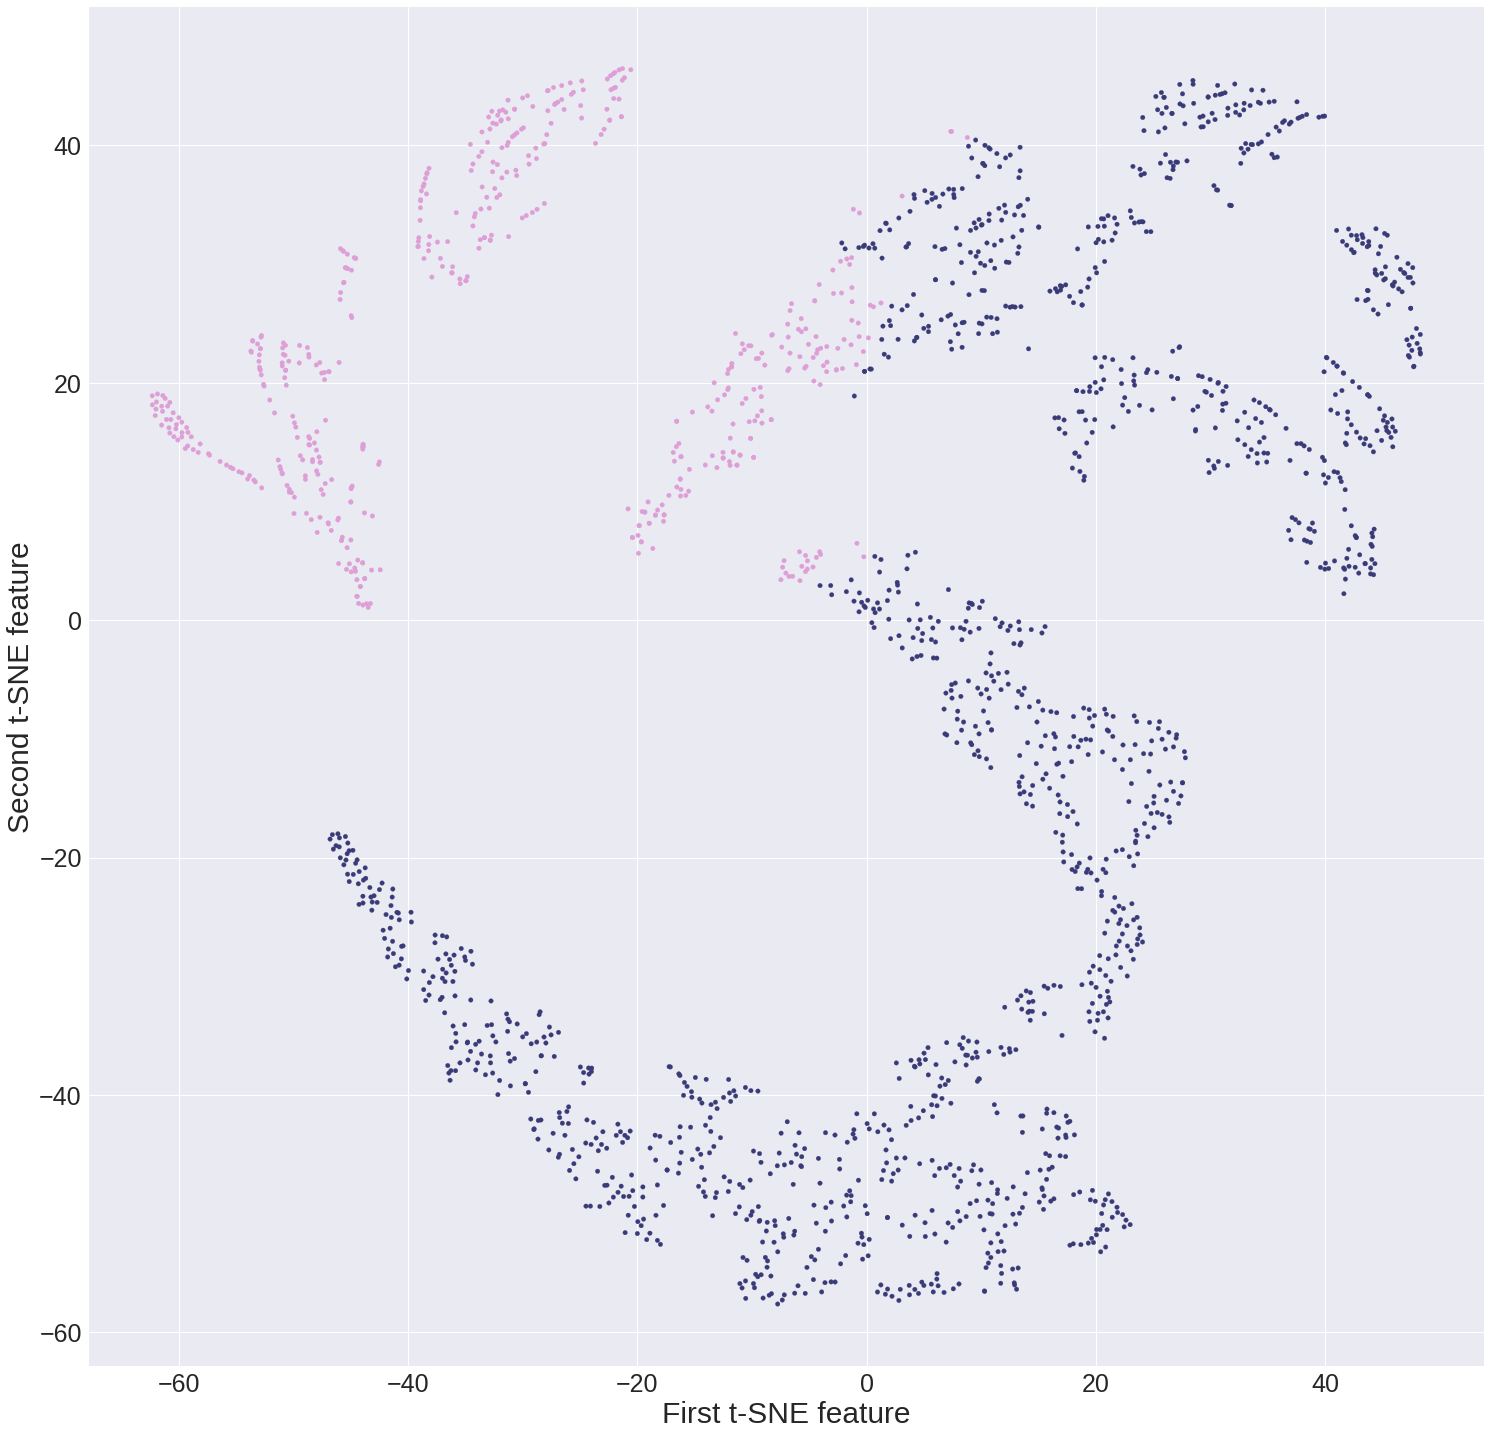

<Figure size 576x396 with 0 Axes>

In [24]:
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 25,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25})
plt.figure(figsize=(25, 25))

plt.scatter(X_embedded[:,0], X_embedded[:,1], c= labels, cmap = 'tab20b', s=20)

plt.xlabel('First t-SNE feature', fontsize = 30)
plt.ylabel('Second t-SNE feature', fontsize= 30)
plt.show()
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/GPM_IMERG/tnse2_largeintense.png')

## test classification with lowest precip features vs. highest impact features

In [3]:
area= gpm_cells.sort_values(by= 'max_area')
low= area[0:10000]
high= area[area.shape[0] - 10000:area.shape[0]]

In [4]:
data= np.append(low.iloc[:,2:10].values,high.iloc[:,2:10].values, axis = 0)
data.shape

(20000, 8)

In [5]:
X = data # input matrix shape (n_samples = n x cells, n_features= n x cell stats)
k = 2
kmeans = KMeans(n_clusters= k, random_state=0).fit(X)


# attributes
centers = kmeans.cluster_centers_ # n_clusters x n_features (center value for each variable)
labels = kmeans.labels_ # contains the actual classes 1 - 7 of the different centers


In [10]:
X= TSNE(n_components=2, verbose=1 , perplexity= 200).fit_transform(X)
# perplexity: look at more nearest neighbors 

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.005s...
[t-SNE] Computed neighbors for 20000 samples in 1.408s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

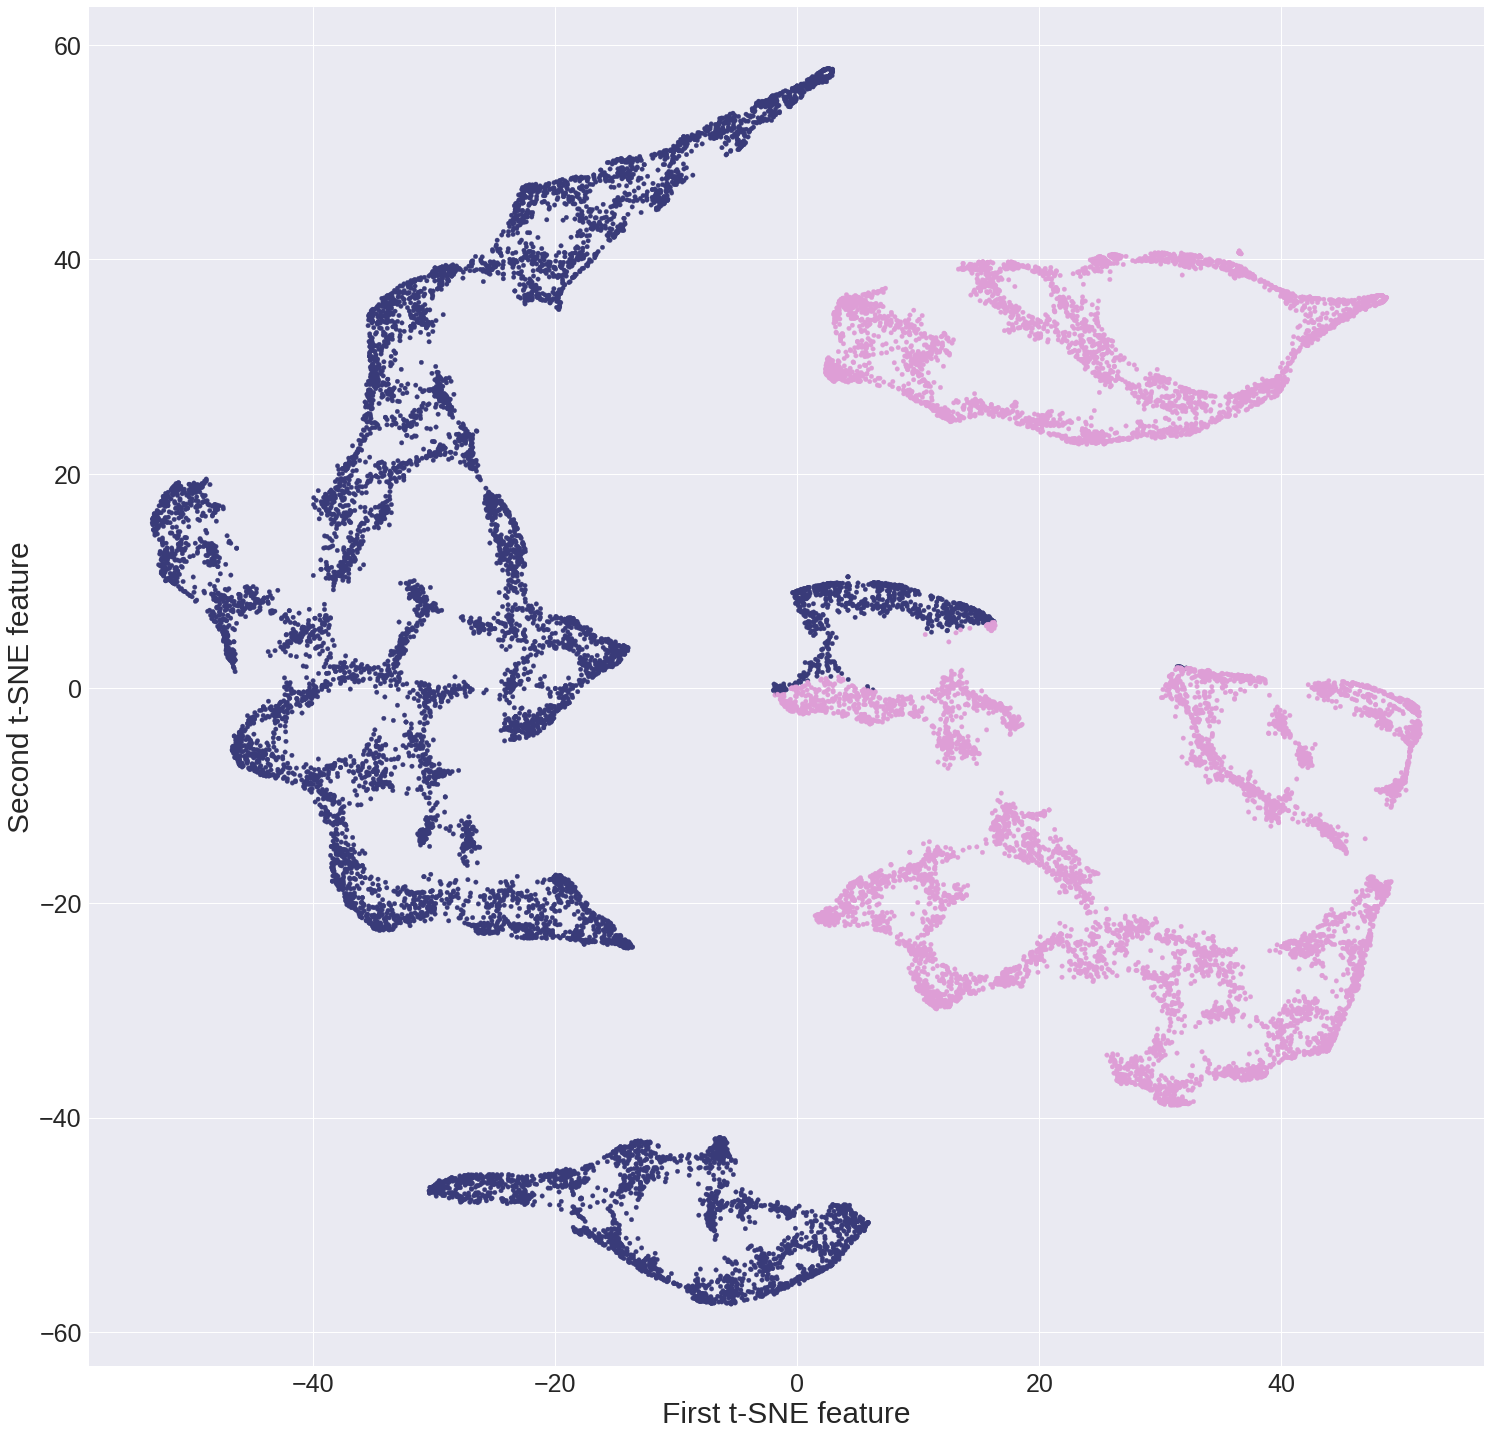

<Figure size 576x396 with 0 Axes>

In [11]:
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 25,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25})
plt.figure(figsize=(25, 25))

plt.scatter(X[:,0], X[:,1], c= labels, cmap = 'tab20b', s=20)

plt.xlabel('First t-SNE feature', fontsize = 30)
plt.ylabel('Second t-SNE feature', fontsize= 30)
plt.show()
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/GPM_IMERG/tnse_2classesperp200.png')